In [30]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [31]:
# Cargar datos
csv_path = "/Users/melaniealvarez/Documents/Octavo semestres/Data Mining/trading/project_trading_DT/data/raw/TLT.csv"
df = pd.read_csv(csv_path, parse_dates=["Date"])

#Estilo
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (12, 6)

In [32]:
# Información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3596 non-null   datetime64[ns]
 1   Close   3596 non-null   float64       
 2   High    3596 non-null   float64       
 3   Low     3596 non-null   float64       
 4   Open    3596 non-null   float64       
 5   Volume  3596 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 168.7 KB
None


In [33]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,3596,3596.000000,3596.000000,3596.000000,3596.000000,3.596000e+03
mean,2018-02-16 05:49:59.332591872,99.748416,100.202807,99.286421,99.736650,1.457315e+07
min,2010-12-27 00:00:00,60.205357,60.853898,60.171208,60.546682,9.872000e+05
25%,2014-07-23 18:00:00,87.790760,88.131015,87.437547,87.781237,6.885750e+06
50%,2018-02-15 12:00:00,96.852730,97.226287,96.354106,96.740563,9.819500e+06
75%,2021-09-13 06:00:00,105.846973,106.301750,105.485400,105.886728,1.673435e+07
max,2025-04-11 00:00:00,150.869629,157.025066,150.122178,156.500783,1.313535e+08
std,NaN,18.679043,18.786148,18.588366,18.701687,1.290894e+07


In [34]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
df.isnull().sum()


Valores faltantes por columna:


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [35]:
# Returns diarios
df["Return"] = df["Close"].pct_change()


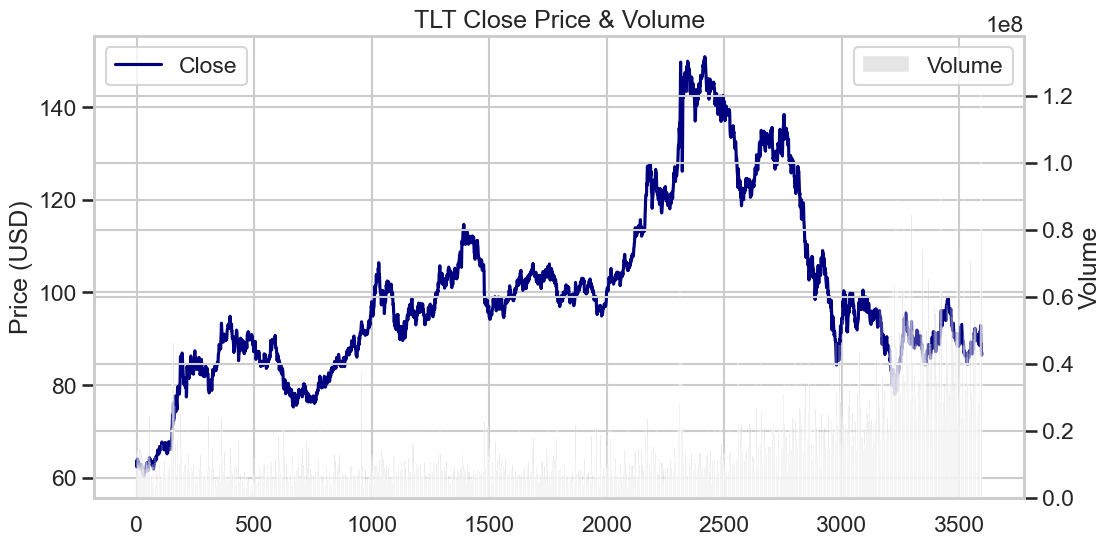

In [36]:
# Closing Price & Volume
fig, ax1 = plt.subplots()
ax1.plot(df["Close"], color="navy", label="Close")
ax1.set_ylabel("Price (USD)")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.bar(df.index, df["Volume"], alpha=0.2, color="gray", label="Volume")
ax2.set_ylabel("Volume")
ax2.legend(loc="upper right")
plt.title("TLT Close Price & Volume")
plt.show()

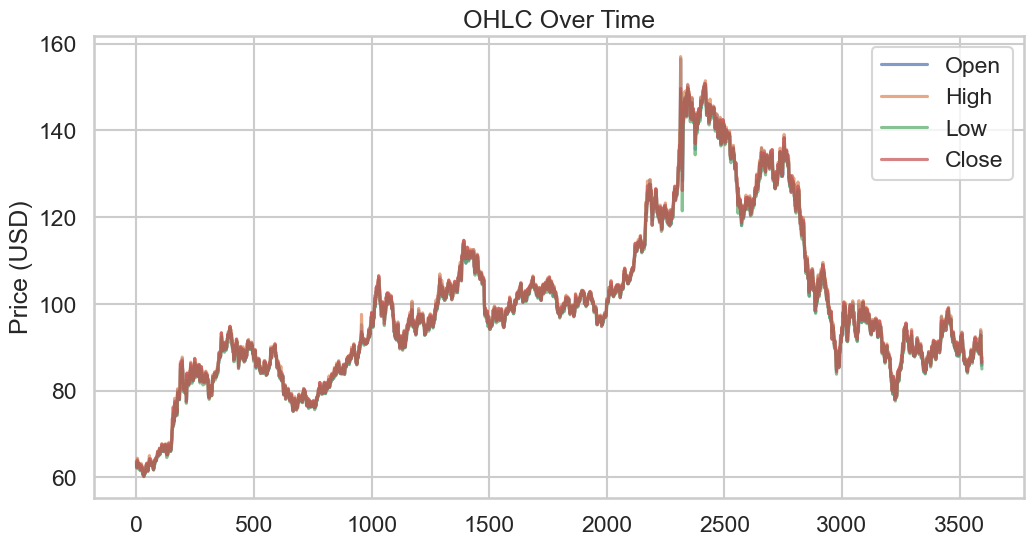

In [37]:
#Open/High/Low/Close Overlay
df[["Open","High","Low","Close"]].plot(alpha=0.7)
plt.title("OHLC Over Time")
plt.ylabel("Price (USD)")
plt.show()


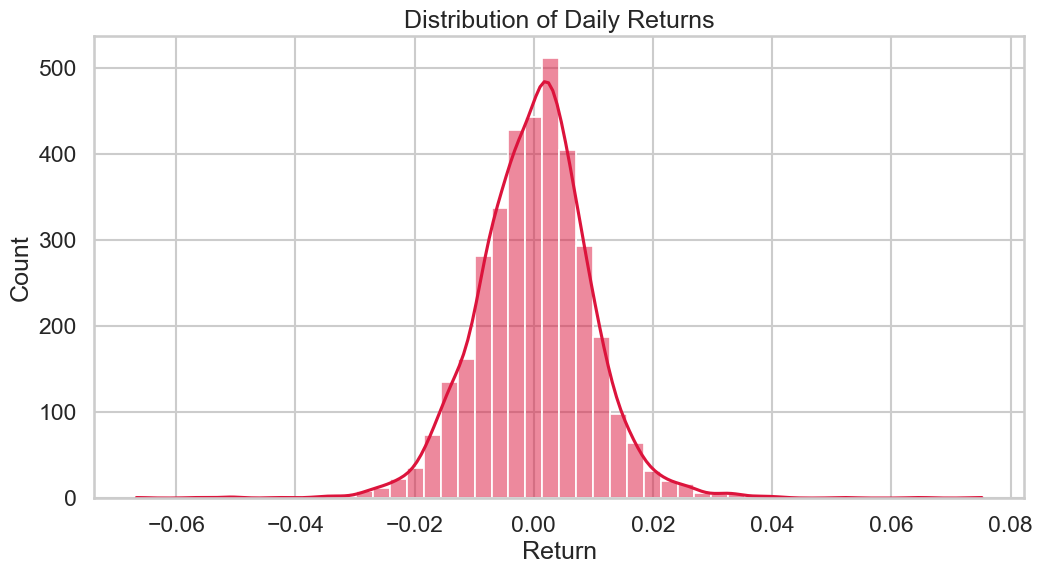

In [38]:
#Histograma del Returno Diario
sns.histplot(df["Return"].dropna(), bins=50, kde=True, color="crimson")
plt.title("Distribution of Daily Returns")
plt.xlabel("Return")
plt.show()

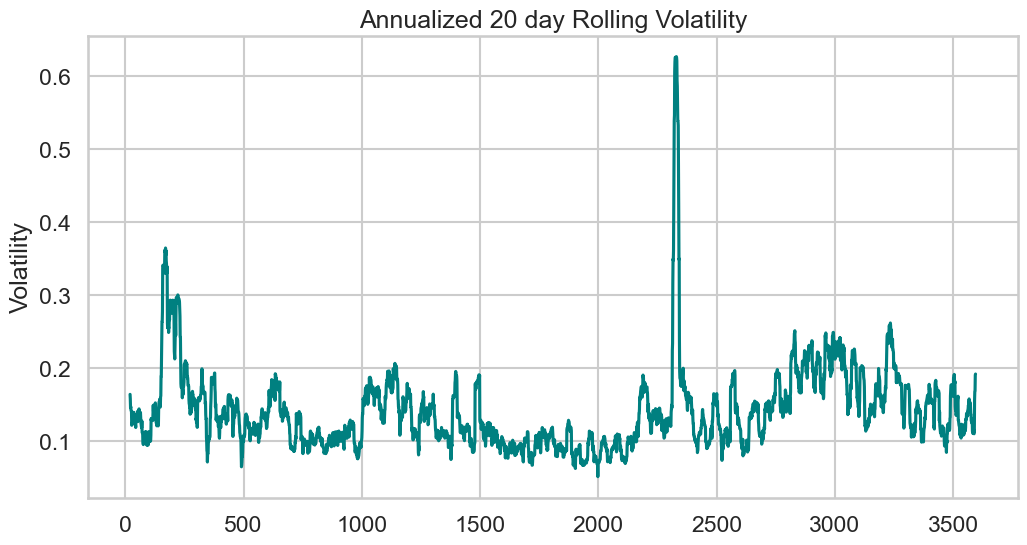

In [39]:
#Rolling Volatility (20‑dias)
df["Volatility20"] = df["Return"].rolling(20).std() * np.sqrt(252)
df["Volatility20"].plot(color="teal")
plt.title("Annualized 20 day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()

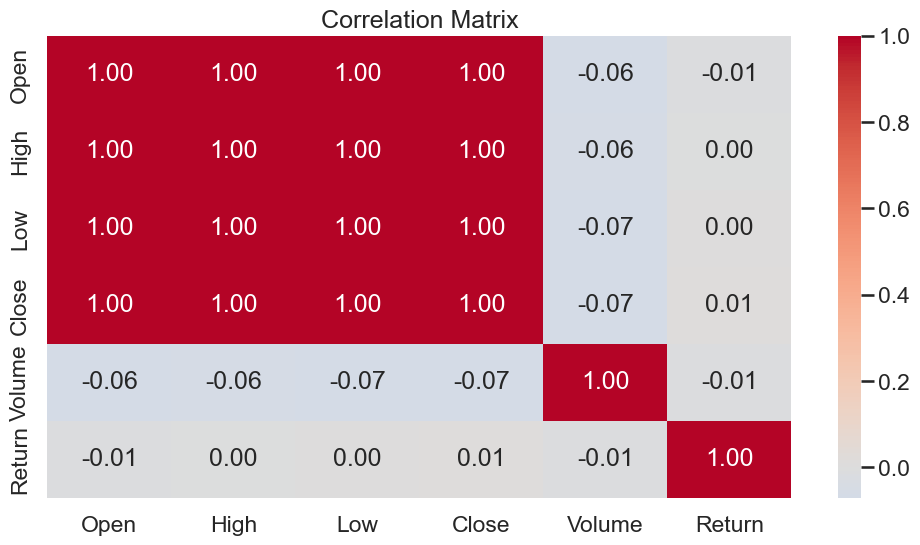

In [40]:
#Analisis de Correlacion
corr = df[["Open","High","Low","Close","Volume","Return"]].dropna().corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

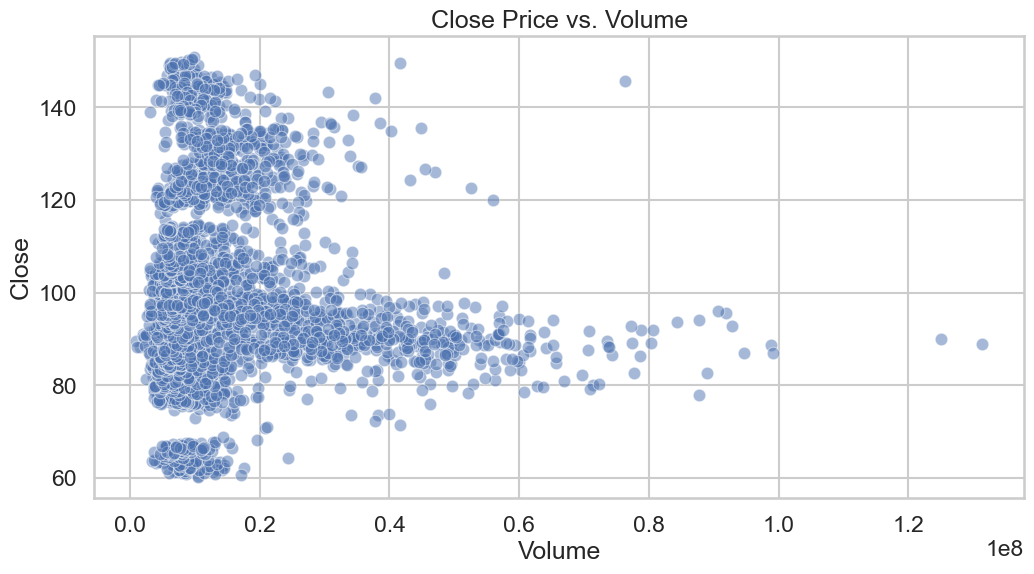

In [41]:
#Close vs. Volume
sns.scatterplot(x="Volume", y="Close", data=df, alpha=0.5)
plt.title("Close Price vs. Volume")
plt.show()

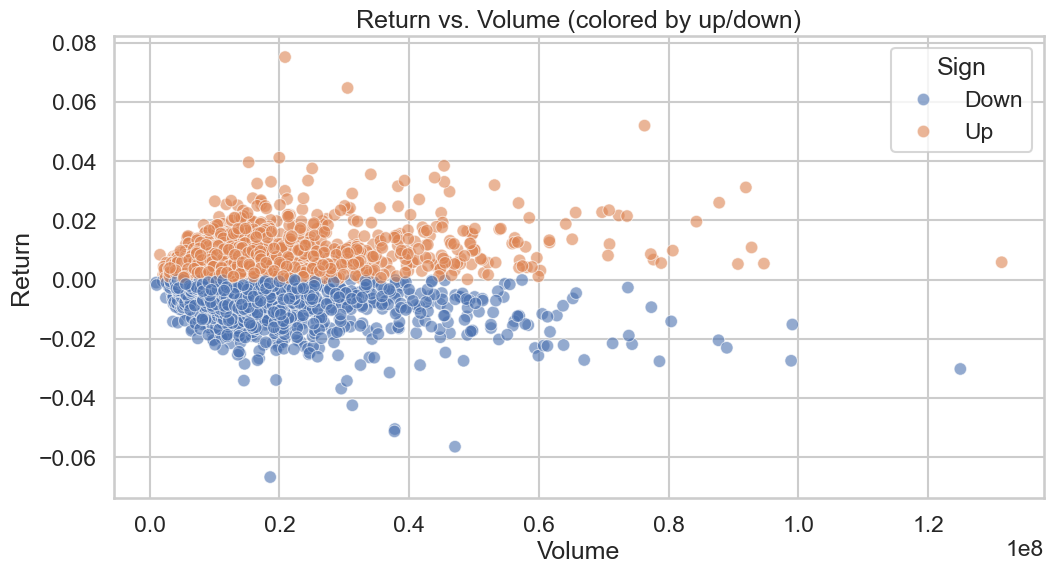

In [42]:
#Return vs. Volume (up vs down days)
df["Sign"] = np.where(df["Return"]>0, "Up", "Down")
sns.scatterplot(x="Volume", y="Return", hue="Sign", data=df, alpha=0.6)
plt.title("Return vs. Volume (colored by up/down)")
plt.show()

In [43]:
#Busqueda de outliers
# Seleccionar únicamente columnas numéricas (excluyendo "Date")
numeric_cols = df.select_dtypes(include=["number"]).columns

# Diccionario para almacenar los outliers por columna
outliers_dict = {}

for col in numeric_cols:
    # Calcular los cuartiles e IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers para la columna
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers

    # Mostrar resultados (incluye la fecha para identificar en qué fila se encuentran)
    print(f"Outliers en la columna '{col}':")
    if not outliers.empty:
        print(outliers[["Date", col]])
    else:
        print("No se encontraron outliers.")
    print("\n")


Outliers en la columna 'Close':
           Date       Close
28   2011-02-04   60.628593
30   2011-02-08   60.382847
32   2011-02-10   60.205357
2308 2020-02-28  135.512558
2309 2020-03-02  134.515579
...         ...         ...
2767 2021-12-22  134.486816
2768 2021-12-23  133.319839
2769 2021-12-27  133.642990
2770 2021-12-28  133.113419
2773 2021-12-31  133.023590

[290 rows x 2 columns]


Outliers en la columna 'High':
           Date        High
32   2011-02-10   60.853898
2307 2020-02-27  133.566839
2308 2020-02-28  136.097151
2309 2020-03-02  136.752552
2310 2020-03-03  139.548814
...         ...         ...
2767 2021-12-22  134.522717
2768 2021-12-23  134.289309
2769 2021-12-27  133.759676
2770 2021-12-28  134.450931
2773 2021-12-31  133.777618

[286 rows x 2 columns]


Outliers en la columna 'Low':
           Date         Low
30   2011-02-08   60.321408
31   2011-02-09   60.171208
32   2011-02-10   60.198528
2308 2020-02-28  134.509154
2309 2020-03-02  134.358285
...         ...

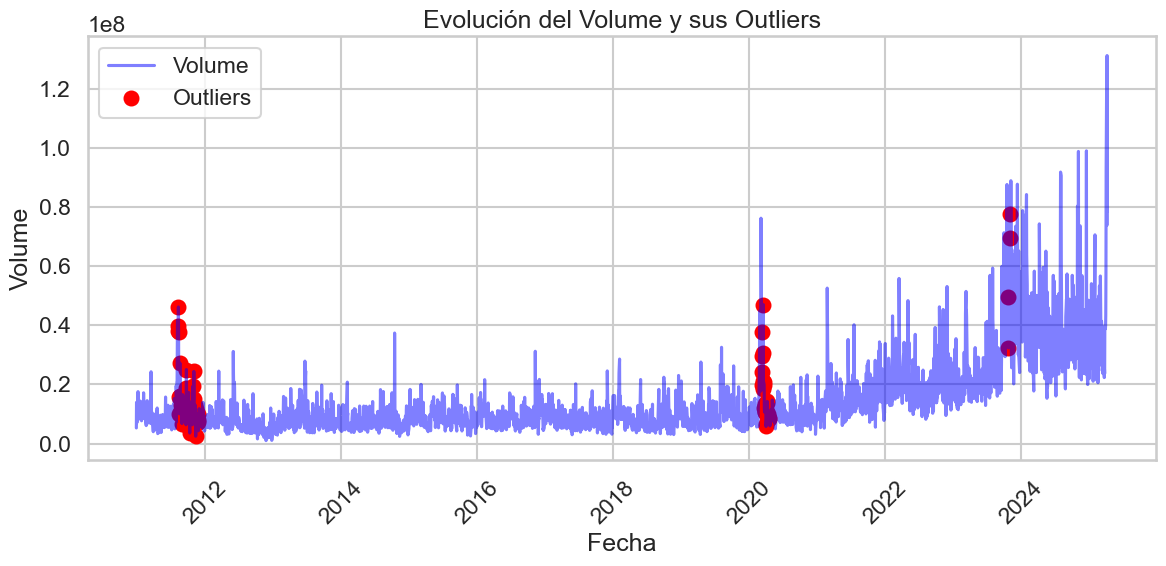

In [44]:
# Dibujar el gráfico
plt.figure(figsize=(12, 6))
# Graficamos la serie completa de Volume a lo largo del tiempo
plt.plot(df["Date"], df["Volume"], label="Volume", color="blue", alpha=0.5)
# Superponemos los outliers en rojo
plt.scatter(outliers["Date"], outliers["Volume"], color="red", label="Outliers", marker="o", s=100)
plt.xlabel("Fecha")
plt.ylabel("Volume")
plt.title("Evolución del Volume y sus Outliers")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
df["day_of_week"] = df["Date"].dt.day_name()
df.groupby("day_of_week")["return_daily"].mean().plot(kind="bar", title="Retorno Promedio por Día de la Semana")

KeyError: 'Column not found: return_daily'